In [5]:
import os
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

experiment_dir = Path("/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments")
training_data_cache_dir = Path("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/data/training_data_cache")
dev_dir = Path("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/dev/notebooks")

# Macrophage experiments
macrophage_experiment_dict = {
    "Initial Settings": experiment_dir / "Macrophage_base_settings" / "chr19" / "model_training_006",
    "model_d_128_ff_512": experiment_dir / "Macrophage_model_d_128_ff_512" / "chr19" / "model_training_001",
    "small_batch_size": experiment_dir / "Macrophage_small_batch_size" / "chr19" / "model_training_002",
    "loose_1_pct_filtering": experiment_dir / "Macrophage_loose_1_pct_filtering" / "chr19" / "model_training_001",
    "strict_10_pct_filtering": experiment_dir / "Macrophage_strict_10_pct_filtering" / "chr19" / "model_training_001",
    "40k_distance_scale_factor": experiment_dir / "Macrophage_40k_distance_scale_factor" / "chr19" / "model_training_001",
    "10k_distance_scale_factor": experiment_dir / "Macrophage_10k_distance_scale_factor" / "chr19" / "model_training_002",
    "150k_max_peak_dist": experiment_dir / "Macrophage_150k_max_peak_dist" / "chr19" / "model_training_001",
    "50k_max_peak_dist": experiment_dir / "Macrophage_50k_max_peak_dist" / "chr19" / "model_training_001",
    "slow_decay_long_range_two_hop": experiment_dir / "Macrophage_slow_decay_long_range_two_hop" / "chr19" / "model_training_001",
}

macrophage_experiment_training_data_dict = {
    "Initial Settings": training_data_cache_dir / "Macrophage_base_settings",
    "model_d_128_ff_512": training_data_cache_dir / "Macrophage_model_d_128_ff_512",
    "small_batch_size": training_data_cache_dir / "Macrophage_small_batch_size",
    "loose_1_pct_filtering": training_data_cache_dir / "Macrophage_loose_1_pct_filtering",
    "strict_10_pct_filtering": training_data_cache_dir / "Macrophage_strict_10_pct_filtering",
    "40k_distance_scale_factor": training_data_cache_dir / "Macrophage_40k_distance_scale_factor",
    "10k_distance_scale_factor": training_data_cache_dir / "Macrophage_10k_distance_scale_factor",
    "150k_max_peak_dist": training_data_cache_dir / "Macrophage_150k_max_peak_dist",
    "50k_max_peak_dist": training_data_cache_dir / "Macrophage_50k_max_peak_dist",
    "slow_decay_long_range_two_hop": training_data_cache_dir / "Macrophage_slow_decay_long_range_two_hop",
}


mesc_experiment_dict = {
    "Initial Settings": experiment_dir / "mESC_no_scale_linear" / "model_training_192_10k_metacells",

    "large_neighborhood_count_filter": experiment_dir / "mESC_large_neighborhood_count_filter" / "chr19" / "model_training_001",
    "large_neighborhood": experiment_dir / "mESC_large_neighborhood" / "chr19" / "model_training_001",
    "small_neighborhood": experiment_dir / "mESC_small_neighborhood" / "chr19" / "model_training_001",
    "small_neighborhood_high_self_weight": experiment_dir / "mESC_small_neighborhood_high_self_weight" / "chr19" / "model_training_001",

    "slower_dist_decay": experiment_dir / "mESC_slower_dist_decay" / "chr19" / "model_training_001",
    "max_dist_bias": experiment_dir / "mESC_max_dist_bias" / "chr19" / "model_training_002",
    "slow_decay_max_dist": experiment_dir / "mESC_slow_decay_max_dist" / "chr19" / "model_training_001",

    "filter_lowest_ten_pct": experiment_dir / "mESC_filter_lowest_ten_pct" / "chr19" / "model_training_003",
    "lower_peak_threshold": experiment_dir / "mESC_lower_peak_threshold" / "chr19" / "model_training_001",
    "no_filter_to_nearest_gene": experiment_dir / "mESC_no_filter_to_nearest_gene" / "chr19" / "model_training_003",

    "smaller_window_size": experiment_dir / "mESC_smaller_window_size" / "chr19" / "model_training_004",
    "larger_window_size": experiment_dir / "mESC_larger_window_size" / "chr19" / "model_training_002",

    "lower_max_peak_dist": experiment_dir / "mESC_lower_max_peak_dist" / "chr19" / "model_training_002",
    "higher_max_peak_dist": experiment_dir / "mESC_higher_max_peak_dist" / "chr19" / "model_training_002",

    "test_new_pipeline": experiment_dir / "mESC_test_new_pipeline" / "chr19" / "model_training_002",

    "slow_decay_filter_ten_pct": experiment_dir / "mESC_slow_decay_filter_ten_pct" / "chr19" / "model_training_001",
    "fast_decay_large_window": experiment_dir / "mESC_fast_decay_large_window" / "chr19" / "model_training_001",
    "slow_decay_small_window": experiment_dir / "mESC_slow_decay_small_window" / "chr19" / "model_training_001",

    "fewer_pca_components": experiment_dir / "mESC_fewer_pca_components" / "chr19" / "model_training_001",
    "more_pca_components": experiment_dir / "mESC_more_pca_components" / "chr19" / "model_training_001",

    "one_hop_diffusion": experiment_dir / "mESC_one_hop_diffusion" / "chr19" / "model_training_001",
    "two_hop_diffusion": experiment_dir / "mESC_two_hop_diffusion" / "chr19" / "model_training_001",
    "one_hop_large_neighborhood": experiment_dir / "mESC_one_hop_large_neighborhood" / "chr19" / "model_training_001",

    "strict_genes_lenient_peaks": experiment_dir / "mESC_strict_genes_lenient_peaks" / "chr19" / "model_training_001",
    "lenient_genes_strict_peaks": experiment_dir / "mESC_lenient_genes_strict_peaks" / "chr19" / "model_training_001",
    "strict_filter_twenty_pct": experiment_dir / "mESC_strict_filter_twenty_pct" / "chr19" / "model_training_001",

    "promoter_2kb": experiment_dir / "mESC_promoter_2kb" / "chr19" / "model_training_001",
    "promoter_5kb": experiment_dir / "mESC_promoter_5kb" / "chr19" / "model_training_001",

    "very_short_range": experiment_dir / "mESC_very_short_range" / "chr19" / "model_training_001",
    "long_range_enhancers": experiment_dir / "mESC_long_range_enhancers" / "chr19" / "model_training_001",
    
    "slow_decay_long_range_two_hop": experiment_dir / "mESC_slow_decay_long_range_two_hop" / "chr19" / "model_training_001",
    "slow_decay_long_range_zero_hops": experiment_dir / "mESC_slow_decay_long_range_zero_hops" / "chr19" / "model_training_001",
    
    "promoter_only_2kb_two_hop": experiment_dir / "mESC_promoter_only_2kb_two_hop" / "chr19" / "model_training_001",
    "promoter_only_5kb_two_hop": experiment_dir / "mESC_promoter_only_5kb_two_hop" / "chr19" / "model_training_001",
    "promoter_only_10kb_two_hop": experiment_dir / "mESC_promoter_only_10kb_two_hop" / "chr19" / "model_training_001",
    
    "decay_30k_long_range_two_hop": experiment_dir / "mESC_decay_30k_long_range_two_hop" / "chr19" / "model_training_001",
    "decay_50k_long_range_two_hop": experiment_dir / "mESC_decay_50k_long_range_two_hop" / "chr19" / "model_training_001",
    "decay_75k_long_range_two_hop": experiment_dir / "mESC_decay_75k_long_range_two_hop" / "chr19" / "model_training_001",
}

mesc_experiment_training_data_dict = {
    "Initial Settings": training_data_cache_dir / "mESC_no_scale_linear",

    "large_neighborhood_count_filter": training_data_cache_dir / "mESC_large_neighborhood_count_filter",
    "large_neighborhood": training_data_cache_dir / "mESC_large_neighborhood",
    "small_neighborhood": training_data_cache_dir / "mESC_small_neighborhood",
    "small_neighborhood_high_self_weight": training_data_cache_dir / "mESC_small_neighborhood_high_self_weight",

    "slower_dist_decay": training_data_cache_dir / "mESC_slower_dist_decay",
    "max_dist_bias": training_data_cache_dir / "mESC_max_dist_bias",
    "slow_decay_max_dist": training_data_cache_dir / "mESC_slow_decay_max_dist",

    "filter_lowest_ten_pct": training_data_cache_dir / "mESC_filter_lowest_ten_pct",
    "lower_peak_threshold": training_data_cache_dir / "mESC_lower_peak_threshold",
    "no_filter_to_nearest_gene": training_data_cache_dir / "mESC_no_filter_to_nearest_gene",

    "smaller_window_size": training_data_cache_dir / "mESC_smaller_window_size",
    "larger_window_size": training_data_cache_dir / "mESC_larger_window_size",

    "lower_max_peak_dist": training_data_cache_dir / "mESC_lower_max_peak_dist",
    "higher_max_peak_dist": training_data_cache_dir / "mESC_higher_max_peak_dist",

    "test_new_pipeline": training_data_cache_dir / "mESC_test_new_pipeline",

    "slow_decay_filter_ten_pct": training_data_cache_dir / "mESC_slow_decay_filter_ten_pct",
    "fast_decay_large_window": training_data_cache_dir / "mESC_fast_decay_large_window",
    "slow_decay_small_window": training_data_cache_dir / "mESC_slow_decay_small_window",

    "fewer_pca_components": training_data_cache_dir / "mESC_fewer_pca_components",
    "more_pca_components": training_data_cache_dir / "mESC_more_pca_components",

    "one_hop_diffusion": training_data_cache_dir / "mESC_one_hop_diffusion",
    "two_hop_diffusion": training_data_cache_dir / "mESC_two_hop_diffusion",
    "one_hop_large_neighborhood": training_data_cache_dir / "mESC_one_hop_large_neighborhood",

    "strict_genes_lenient_peaks": training_data_cache_dir / "mESC_strict_genes_lenient_peaks",
    "lenient_genes_strict_peaks": training_data_cache_dir / "mESC_lenient_genes_strict_peaks",
    "strict_filter_twenty_pct": training_data_cache_dir / "mESC_strict_filter_twenty_pct",

    "promoter_2kb": training_data_cache_dir / "mESC_promoter_2kb",
    "promoter_5kb": training_data_cache_dir / "mESC_promoter_5kb",

    "very_short_range": training_data_cache_dir / "mESC_very_short_range",
    "long_range_enhancers": training_data_cache_dir / "mESC_long_range_enhancers",
    
    "slow_decay_long_range_two_hop": experiment_dir / "mESC_slow_decay_long_range_two_hop" / "chr19" / "model_training_001",
    "slow_decay_long_range_zero_hops": experiment_dir / "mESC_slow_decay_long_range_zero_hops" / "chr19" / "model_training_001",
    
    "promoter_only_2kb_two_hop": experiment_dir / "mESC_promoter_only_2kb_two_hop" / "chr19" / "model_training_001",
    "promoter_only_5kb_two_hop": experiment_dir / "mESC_promoter_only_5kb_two_hop" / "chr19" / "model_training_001",
    "promoter_only_10kb_two_hop": experiment_dir / "mESC_promoter_only_10kb_two_hop" / "chr19" / "model_training_001",
    
    "decay_30k_long_range_two_hop": experiment_dir / "mESC_decay_30k_long_range_two_hop" / "chr19" / "model_training_001",
    "decay_50k_long_range_two_hop": experiment_dir / "mESC_decay_50k_long_range_two_hop" / "chr19" / "model_training_001",
    "decay_75k_long_range_two_hop": experiment_dir / "mESC_decay_75k_long_range_two_hop" / "chr19" / "model_training_001",

}


all_experiments = []

experiment = "Macrophage"

if experiment == "mESC":
    experiment_dict = mesc_experiment_dict
    experiment_training_data_dict = mesc_experiment_training_data_dict
    GT_ORDER = ["ChIP-Atlas", "RN111", "RN112", "RN114", "RN115", "RN116"]
    
elif experiment == "Macrophage":
    experiment_dict = macrophage_experiment_dict
    experiment_training_data_dict = macrophage_experiment_training_data_dict
    GT_ORDER = ["RN204"]
    
else:
    raise ValueError(f"Unknown experiment: {experiment}")

# Excel/Sheet ordering
METHOD_ORDER = ["Gradient Attribution", "TF Knockout"]

def compute_total_windows(cache_dir: Path) -> int:
    total = 0
    for d in cache_dir.iterdir():
        if d.is_dir() and d.name.startswith("chr"):
            with open(cache_dir / d / f"window_map_{d.name}.json", "r") as f:
                window_map = json.load(f)
            total += len(window_map)
    return total

def format_block_columns(prefix: str, gt_order=GT_ORDER):
    """
    Returns the column order for one method block exactly like your sheet:
    Experiment | Mean AUROC/AUPRC | then each GT has AUROC, Per-TF AUROC, AUPRC, Per-TF AUPRC
    """
    cols = [
        (prefix, "Mean", "AUROC"),
        (prefix, "Mean", "AUPRC"),
        (prefix, "Mean", "Per-TF AUROC"),
        (prefix, "Mean", "Per-TF AUPRC"),
    ]
    for gt in gt_order:
        cols += [
            (prefix, gt, "AUROC"),
            (prefix, gt, "Per-TF AUROC"),
            (prefix, gt, "AUPRC"),
            (prefix, gt, "Per-TF AUPRC"),
        ]
    return cols

for experiment_name, EXPERIMENT_DIR in experiment_dict.items():
    print(f"\nProcessing experiment: {experiment_name}")


    # --- dataset sizes ---
    with open(EXPERIMENT_DIR / "tf_vocab.json", "r") as f:
        num_tfs = len(json.load(f))
    with open(EXPERIMENT_DIR / "tg_vocab.json", "r") as f:
        num_tgs = len(json.load(f))


    total_windows = compute_total_windows(experiment_training_data_dict[experiment_name])

    # --- final R2 ---
    training_results = pd.read_csv(EXPERIMENT_DIR / "training_log.csv")
    final_epoch_results = training_results.iloc[-1]
    final_train_unscaled_r2 = float(final_epoch_results["R2_u"])
    final_train_scaled_r2   = float(final_epoch_results["R2_s"])

    # ============================================================
    # UPDATED PART: pooled vs per-TF loaded separately
    # ============================================================

    # ---------- 1) POOLED overall mean AUROC/AUPRC ----------
    pooled_overall = pd.read_csv(EXPERIMENT_DIR / "method_ranking_by_auroc_pooled.csv", header=0)
    pooled_overall = pooled_overall.rename(columns={"name": "method_name"})
    pooled_overall = pooled_overall[pooled_overall["method_name"].isin(METHOD_ORDER)]
    pooled_overall = pooled_overall.set_index("method_name")[["mean_auroc", "mean_auprc"]]

    # ---------- 2) POOLED per-GT AUROC/AUPRC ----------
    pooled_gt = pd.read_csv(EXPERIMENT_DIR / "per_gt_method_aucs_pooled.csv", header=0)
    pooled_gt = pooled_gt.rename(columns={"name": "method_name"})
    pooled_gt = pooled_gt[pooled_gt["method_name"].isin(METHOD_ORDER)]
    pooled_gt = pooled_gt[pooled_gt["gt_name"].isin(GT_ORDER)]

    pooled_gt_auroc = pooled_gt.pivot(index="method_name", columns="gt_name", values="auroc")
    pooled_gt_auprc = pooled_gt.pivot(index="method_name", columns="gt_name", values="auprc")

    # ---------- 3) PER-TF detailed -> mean across TFs ----------
    per_tf = pd.read_csv(EXPERIMENT_DIR / "per_tf_auroc_auprc_detailed.csv", header=0)

    # Standardize method column name
    if "method" in per_tf.columns and "method_name" not in per_tf.columns:
        per_tf = per_tf.rename(columns={"method": "method_name"})

    per_tf = per_tf[per_tf["method_name"].isin(METHOD_ORDER)].copy()
    per_tf = per_tf[per_tf["gt_name"].isin(GT_ORDER)].copy()

    # Per-GT per-method: mean across TFs
    per_tf_gt_means = (
        per_tf.groupby(["method_name", "gt_name"], as_index=False)
            .agg(
                per_tf_auroc=("auroc", "mean"),
                per_tf_auprc=("auprc", "mean"),
                n_tfs=("tf", "nunique"),
            )
    )

    per_tf_auroc_lookup = per_tf_gt_means.set_index(["method_name", "gt_name"])["per_tf_auroc"].to_dict()
    per_tf_auprc_lookup = per_tf_gt_means.set_index(["method_name", "gt_name"])["per_tf_auprc"].to_dict()

    # Overall per-TF mean across GTs (left mean block "Per-TF AUROC/AUPRC")
    per_tf_overall = (
        per_tf_gt_means.groupby("method_name", as_index=False)
                    .agg(
                        per_tf_mean_auroc=("per_tf_auroc", "mean"),
                        per_tf_mean_auprc=("per_tf_auprc", "mean"),
                    )
                    .set_index("method_name")
    )

    # ---------- 4) Build one row for this experiment ----------
    row = {
        ("Meta", "", "Experiment"): experiment_name,
        ("Meta", "", "num_tfs"): num_tfs,
        ("Meta", "", "num_windows"): total_windows,
        ("Meta", "", "num_tgs"): num_tgs,
        ("Meta", "", "unscaled_r2"): final_train_unscaled_r2,
        ("Meta", "", "scaled_r2"): final_train_scaled_r2,
    }

    for method in METHOD_ORDER:
        # ---- Mean block ----
        # pooled mean AUROC/AUPRC
        row[(method, "Mean", "AUROC")] = (
            float(pooled_overall.loc[method, "mean_auroc"])
            if method in pooled_overall.index else np.nan
        )
        row[(method, "Mean", "AUPRC")] = (
            float(pooled_overall.loc[method, "mean_auprc"])
            if method in pooled_overall.index else np.nan
        )

        # per-TF mean AUROC/AUPRC (mean across TFs, then mean across GTs)
        row[(method, "Mean", "Per-TF AUROC")] = (
            float(per_tf_overall.loc[method, "per_tf_mean_auroc"])
            if method in per_tf_overall.index else np.nan
        )
        row[(method, "Mean", "Per-TF AUPRC")] = (
            float(per_tf_overall.loc[method, "per_tf_mean_auprc"])
            if method in per_tf_overall.index else np.nan
        )

        # ---- Per-GT blocks ----
        for gt in GT_ORDER:
            # pooled per-GT AUROC/AUPRC
            row[(method, gt, "AUROC")] = (
                float(pooled_gt_auroc.loc[method, gt])
                if (method in pooled_gt_auroc.index and gt in pooled_gt_auroc.columns) else np.nan
            )
            row[(method, gt, "AUPRC")] = (
                float(pooled_gt_auprc.loc[method, gt])
                if (method in pooled_gt_auprc.index and gt in pooled_gt_auprc.columns) else np.nan
            )

            # per-TF per-GT means (mean across TFs)
            row[(method, gt, "Per-TF AUROC")] = float(per_tf_auroc_lookup.get((method, gt), np.nan))
            row[(method, gt, "Per-TF AUPRC")] = float(per_tf_auprc_lookup.get((method, gt), np.nan))

    all_experiments.append(row)


# Build final dataframe
final_df = pd.DataFrame(all_experiments)

# Order columns to match your sheet grouping
meta_cols = [
    ("Meta", "", "Experiment"),
    ("Meta", "", "num_tfs"),
    ("Meta", "", "num_windows"),
    ("Meta", "", "num_tgs"),
    ("Meta", "", "unscaled_r2"),
    ("Meta", "", "scaled_r2"),
]

ordered_cols = meta_cols + format_block_columns("Gradient Attribution") + format_block_columns("TF Knockout")
ordered_cols = [c for c in ordered_cols if c in final_df.columns]  # safety

final_df = final_df[ordered_cols]


# Flatten columns for easy Excel export
def flat(c):
    a, b, d = c
    if a == "Meta":
        return d
    # e.g. "Gradient Attribution | RN111 | Per-TF AUROC"
    return f"{a} | {b} | {d}"

final_df.columns = [flat(c) for c in final_df.columns]

print(final_df.head())
final_df.to_csv(dev_dir / "organized_experiment_results_raw.csv", index=False)

# Export
final_df.to_excel(dev_dir / "excel_chart_ready.xlsx", index=False)
print("Wrote: excel_chart_ready.xlsx")



Processing experiment: Initial Settings

Processing experiment: model_d_128_ff_512

Processing experiment: small_batch_size

Processing experiment: loose_1_pct_filtering

Processing experiment: strict_10_pct_filtering

Processing experiment: 40k_distance_scale_factor

Processing experiment: 10k_distance_scale_factor

Processing experiment: 150k_max_peak_dist

Processing experiment: 50k_max_peak_dist

Processing experiment: slow_decay_long_range_two_hop
                Experiment  num_tfs  num_windows  num_tgs  unscaled_r2  \
0         Initial Settings      164        17669     4880     0.743060   
1       model_d_128_ff_512      413        17669     4880     0.715166   
2         small_batch_size      413        16348     4565     0.930927   
3    loose_1_pct_filtering      412        16875     4578     0.710237   
4  strict_10_pct_filtering      373         4364     4327     0.739007   

   scaled_r2  Gradient Attribution | Mean | AUROC  \
0   0.392369                             0.5

                Experiment  GA_Mean_AUROC  GA_Mean_AUPRC  TFKO_Mean_AUROC  \
0         Initial Settings       0.532607       0.530970         0.358796   
1       model_d_128_ff_512       0.536476       0.544902         0.573016   
2         small_batch_size       0.538866       0.538214         0.510265   
3    loose_1_pct_filtering       0.571677       0.557063         0.539396   
4  strict_10_pct_filtering       0.533162       0.537514         0.503208   

   TFKO_Mean_AUPRC  GA_Mean_Per_TF_AUROC  GA_Mean_Per_TF_AUPRC  \
0         0.500792              0.529532              0.532208   
1         0.554986              0.567398              0.556979   
2         0.542672              0.572722              0.558355   
3         0.541361              0.574582              0.589877   
4         0.536287              0.553931              0.577180   

   TFKO_Mean_Per_TF_AUROC  TFKO_Mean_Per_TF_AUPRC  overall_avg  
0                0.504357                0.509754     0.499877  
1         

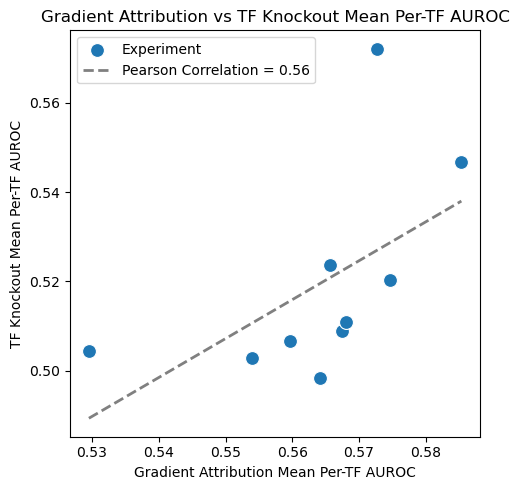

In [6]:
selected_cols = ["Experiment", "Gradient Attribution | Mean | AUROC", "Gradient Attribution | Mean | AUPRC",
                 "TF Knockout | Mean | AUROC", "TF Knockout | Mean | AUPRC", "Gradient Attribution | Mean | Per-TF AUROC",
                 "Gradient Attribution | Mean | Per-TF AUPRC", "TF Knockout | Mean | Per-TF AUROC", "TF Knockout | Mean | Per-TF AUPRC"]

agg_data_df = final_df[selected_cols].copy()
agg_data_df = agg_data_df.rename(columns={
    "Gradient Attribution | Mean | AUROC": "GA_Mean_AUROC",
    "Gradient Attribution | Mean | AUPRC": "GA_Mean_AUPRC",
    "TF Knockout | Mean | AUROC": "TFKO_Mean_AUROC",
    "TF Knockout | Mean | AUPRC": "TFKO_Mean_AUPRC",
    "Gradient Attribution | Mean | Per-TF AUROC": "GA_Mean_Per_TF_AUROC",
    "Gradient Attribution | Mean | Per-TF AUPRC": "GA_Mean_Per_TF_AUPRC",
    "TF Knockout | Mean | Per-TF AUROC": "TFKO_Mean_Per_TF_AUROC",
    "TF Knockout | Mean | Per-TF AUPRC": "TFKO_Mean_Per_TF_AUPRC",
})

# Calculate an overall score for each experiment (mean of all 8 metrics)
agg_data_df["overall_avg"] = (
    agg_data_df[[
        "GA_Mean_AUROC", 
        "GA_Mean_AUPRC", 
        "TFKO_Mean_AUROC", 
        "TFKO_Mean_AUPRC", 
        "GA_Mean_Per_TF_AUROC", 
        "GA_Mean_Per_TF_AUPRC", 
        "TFKO_Mean_Per_TF_AUROC", 
        "TFKO_Mean_Per_TF_AUPRC"
        ]].mean(axis=1)
)
print(agg_data_df.head())

ga_metric = "GA_Mean_Per_TF_AUROC"
tfko_metric = "TFKO_Mean_Per_TF_AUROC"

best_fit_line = np.polyfit(agg_data_df[ga_metric], agg_data_df[tfko_metric], 1)
print(f"Best fit line (TFKO = m*GA + b): m = {best_fit_line[0]:.4f}, b = {best_fit_line[1]:.4f}")
pearson_r = np.corrcoef(agg_data_df[ga_metric], agg_data_df[tfko_metric])[0, 1]
print(f"Pearson correlation coefficient: {pearson_r:.4f}")

plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=agg_data_df,
    x=ga_metric,
    y=tfko_metric,
    s=100,
    label="Experiment"
    )

# Plot the line of best fit
line_range = np.linspace(agg_data_df[ga_metric].min(), agg_data_df[ga_metric].max(), 100)
line = best_fit_line[0] * line_range + best_fit_line[1]
plt.plot(
    line_range, 
    line, 
    color='grey',
    linewidth=2,
    linestyle='--',
    label=f"Pearson Correlation = {pearson_r:.2f}"
    )

if ga_metric == "GA_Mean_AUROC" and tfko_metric == "TFKO_Mean_AUROC":
    plt.title("Gradient Attribution vs TF Knockout Mean AUROC")
    plt.xlabel("Gradient Attribution Mean AUROC")
    plt.ylabel("TF Knockout Mean AUROC")
elif ga_metric == "GA_Mean_Per_TF_AUROC" and tfko_metric == "TFKO_Mean_Per_TF_AUROC":
    plt.title("Gradient Attribution vs TF Knockout Mean Per-TF AUROC")
    plt.xlabel("Gradient Attribution Mean Per-TF AUROC")
    plt.ylabel("TF Knockout Mean Per-TF AUROC")
    
plt.tight_layout()
plt.legend()
plt.show()

                      Experiment  overall_avg  diff_from_initial
0               Initial Settings     0.499877           0.000000
6      10k_distance_scale_factor     0.524574           0.024697
8              50k_max_peak_dist     0.530435           0.030558
4        strict_10_pct_filtering     0.533987           0.034110
5      40k_distance_scale_factor     0.545784           0.045907
1             model_d_128_ff_512     0.546793           0.046915
7             150k_max_peak_dist     0.549161           0.049284
2               small_batch_size     0.551423           0.051546
9  slow_decay_long_range_two_hop     0.552325           0.052448
3          loose_1_pct_filtering     0.554546           0.054669


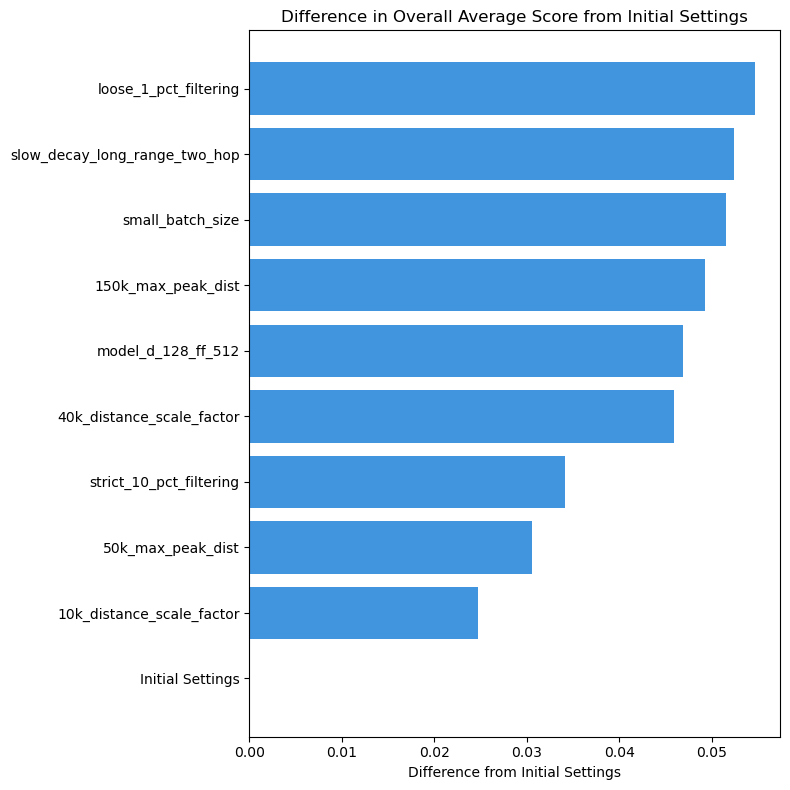

In [7]:
# Experiment by overall average score
agg_data_df = agg_data_df.sort_values(by="overall_avg", ascending=True)

# Difference between the Initial Settings and each experiment
initial_overall_avg = agg_data_df.loc[agg_data_df["Experiment"] == "Initial Settings", "overall_avg"].values[0]
agg_data_df["diff_from_initial"] = agg_data_df["overall_avg"] - initial_overall_avg
print(agg_data_df[["Experiment", "overall_avg", "diff_from_initial"]])

plt.figure(figsize=(8, 8))
plt.barh(agg_data_df["Experiment"], agg_data_df["diff_from_initial"], color='#4195df')
plt.xlabel("Difference from Initial Settings")
plt.title("Difference in Overall Average Score from Initial Settings")
plt.tight_layout()
plt.show()


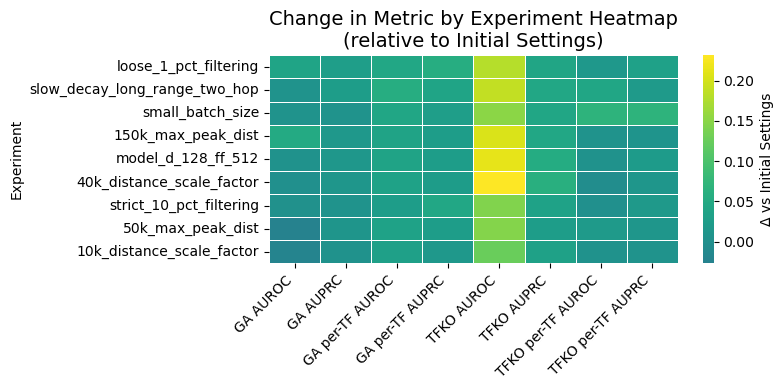

In [8]:
BASELINE = "Initial Settings"

metric_cols = [
    "GA_Mean_AUROC",
    "GA_Mean_AUPRC",
    "GA_Mean_Per_TF_AUROC",
    "GA_Mean_Per_TF_AUPRC",
    "TFKO_Mean_AUROC",
    "TFKO_Mean_AUPRC",
    "TFKO_Mean_Per_TF_AUROC",
    "TFKO_Mean_Per_TF_AUPRC",
]

# Sanity check
missing = set(metric_cols) - set(agg_data_df.columns)
assert not missing, f"Missing columns: {missing}"

# Extract baseline row
baseline_row = agg_data_df.loc[
    agg_data_df["Experiment"] == BASELINE, metric_cols
]

assert len(baseline_row) == 1, "Baseline experiment must appear exactly once"
baseline_row = baseline_row.iloc[0]

# Compute delta per metric
delta_df = agg_data_df.copy()
for c in metric_cols:
    delta_df[c] = delta_df[c] - baseline_row[c]

# Drop baseline itself
delta_df = delta_df[delta_df["Experiment"] != BASELINE]

# Mean delta across all metrics (for sorting)
delta_df["mean_delta"] = delta_df[metric_cols].mean(axis=1)

# Sort experiments by overall improvement
delta_df = delta_df.sort_values("mean_delta", ascending=False)

# Pretty metric labels for plotting
pretty_cols = {
    "GA_Mean_AUROC": "GA AUROC",
    "GA_Mean_AUPRC": "GA AUPRC",
    "GA_Mean_Per_TF_AUROC": "GA per-TF AUROC",
    "GA_Mean_Per_TF_AUPRC": "GA per-TF AUPRC",
    "TFKO_Mean_AUROC": "TFKO AUROC",
    "TFKO_Mean_AUPRC": "TFKO AUPRC",
    "TFKO_Mean_Per_TF_AUROC": "TFKO per-TF AUROC",
    "TFKO_Mean_Per_TF_AUPRC": "TFKO per-TF AUPRC",
}

heat = (
    delta_df
    .set_index("Experiment")[metric_cols]
    .rename(columns=pretty_cols)
)

plt.figure(figsize=(8, max(4, 0.30 * heat.shape[0])))
sns.heatmap(
    heat,
    center=0,
    cmap="viridis",
    linewidths=0.5,
    linecolor="white",
    annot=False,
    cbar_kws={"label": "Δ vs Initial Settings"},
)

plt.title("Change in Metric by Experiment Heatmap\n(relative to Initial Settings)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


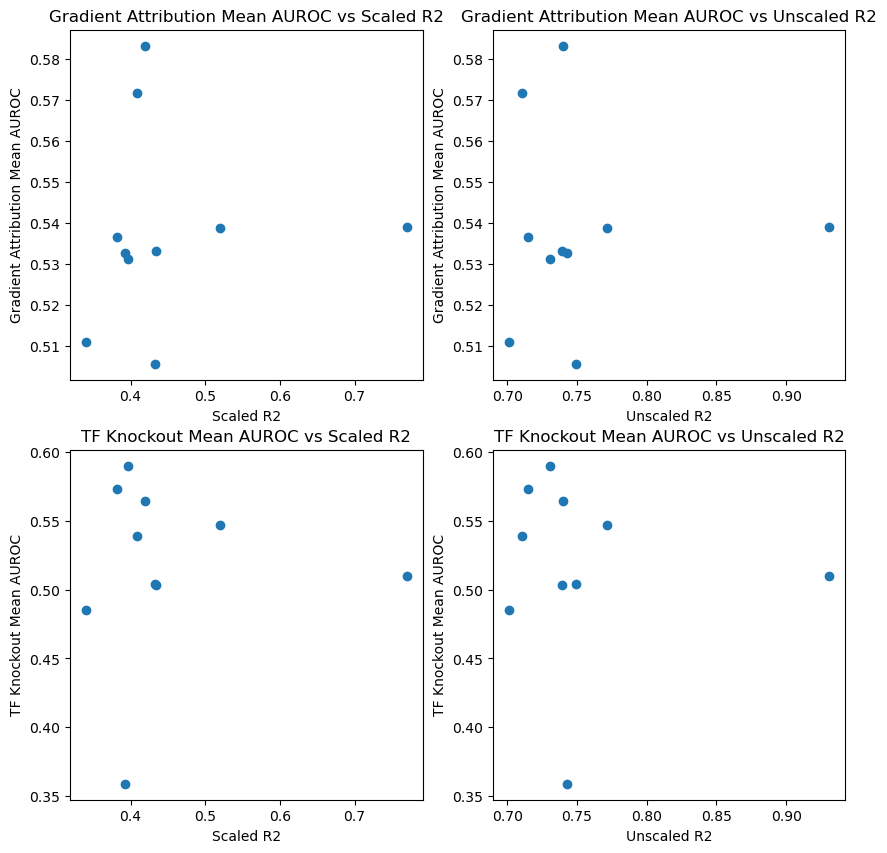

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax[0,0].set_title("Gradient Attribution Mean AUROC vs Scaled R2")
ax[0,0].scatter(final_df["scaled_r2"], final_df["Gradient Attribution | Mean | AUROC"])
ax[0,0].set_ylabel("Gradient Attribution Mean AUROC")
ax[0,0].set_xlabel("Scaled R2")

ax[0,1].set_title("Gradient Attribution Mean AUROC vs Unscaled R2")
ax[0,1].scatter(final_df["unscaled_r2"], final_df["Gradient Attribution | Mean | AUROC"])
ax[0,1].set_ylabel("Gradient Attribution Mean AUROC")
ax[0,1].set_xlabel("Unscaled R2")

ax[1,0].set_title("TF Knockout Mean AUROC vs Scaled R2")
ax[1,0].scatter(final_df["scaled_r2"], final_df["TF Knockout | Mean | AUROC"])
ax[1,0].set_ylabel("TF Knockout Mean AUROC")
ax[1,0].set_xlabel("Scaled R2")

ax[1,1].set_title("TF Knockout Mean AUROC vs Unscaled R2")
ax[1,1].scatter(final_df["unscaled_r2"], final_df["TF Knockout | Mean | AUROC"])
ax[1,1].set_ylabel("TF Knockout Mean AUROC")
ax[1,1].set_xlabel("Unscaled R2")


plt.show()

In [12]:
final_df.head()

,Experiment,num_tfs,num_windows,num_tgs,unscaled_r2,scaled_r2,Gradient Attribution | Mean | AUROC,Gradient Attribution | Mean | AUPRC,Gradient Attribution | Mean | Per-TF AUROC,Gradient Attribution | Mean | Per-TF AUPRC,...,Gradient Attribution | RN204 | AUPRC,Gradient Attribution | RN204 | Per-TF AUPRC,TF Knockout | Mean | AUROC,TF Knockout | Mean | AUPRC,TF Knockout | Mean | Per-TF AUROC,TF Knockout | Mean | Per-TF AUPRC,TF Knockout | RN204 | AUROC,TF Knockout | RN204 | Per-TF AUROC,TF Knockout | RN204 | AUPRC,TF Knockout | RN204 | Per-TF AUPRC
0,Initial Settings,164,17669,4880,0.743060,0.392369,0.532607,0.530970,0.529532,0.532208,...,0.530970,0.532208,0.358796,0.500792,0.504357,0.509754,0.358796,0.504357,0.500792,0.509754
1,model_d_128_ff_512,413,17669,4880,0.715166,0.382276,0.536476,0.544902,0.567398,0.556979,...,0.544902,0.556979,0.573016,0.554986,0.508851,0.531733,0.573016,0.508851,0.554986,0.531733
2,small_batch_size,413,16348,4565,0.930927,0.769633,0.538866,0.538214,0.572722,0.558355,...,0.538214,0.558355,0.510265,0.542672,0.572054,0.578235,0.510265,0.572054,0.542672,0.578235
3,loose_1_pct_filtering,412,16875,4578,0.710237,0.408252,0.571677,0.557063,0.574582,0.589877,...,0.557063,0.589877,0.539396,0.541361,0.520369,0.542042,0.539396,0.520369,0.541361,0.542042
4,strict_10_pct_filtering,373,4364,4327,0.739007,0.433865,0.533162,0.537514,0.553931,0.577180,...,0.537514,0.577180,0.503208,0.536287,0.502968,0.527644,0.503208,0.502968,0.536287,0.527644


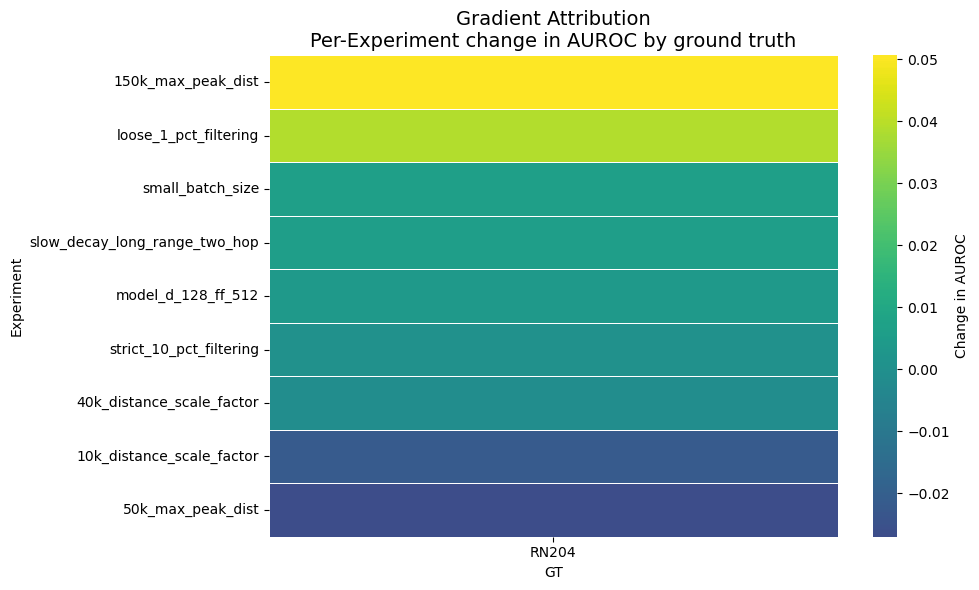

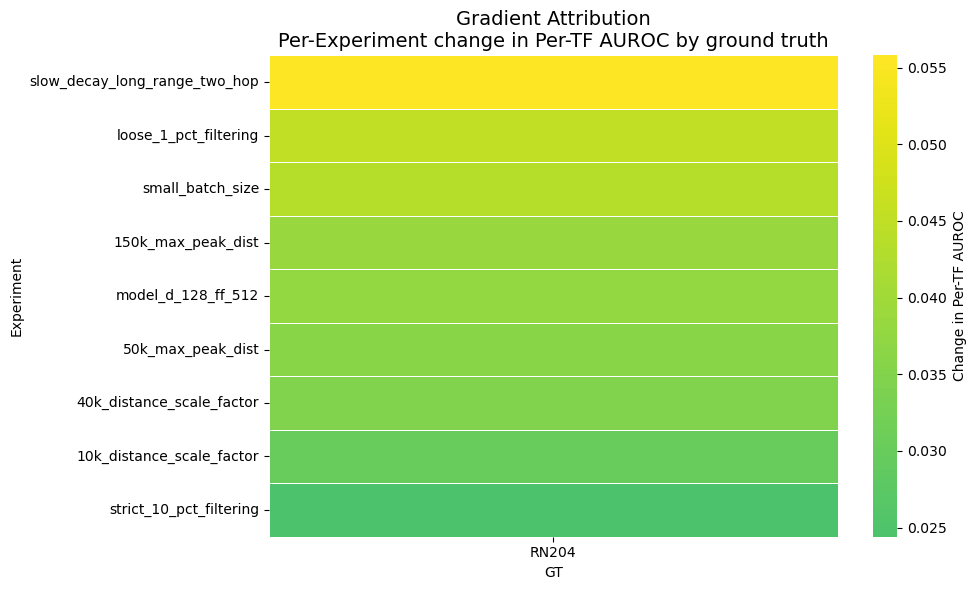

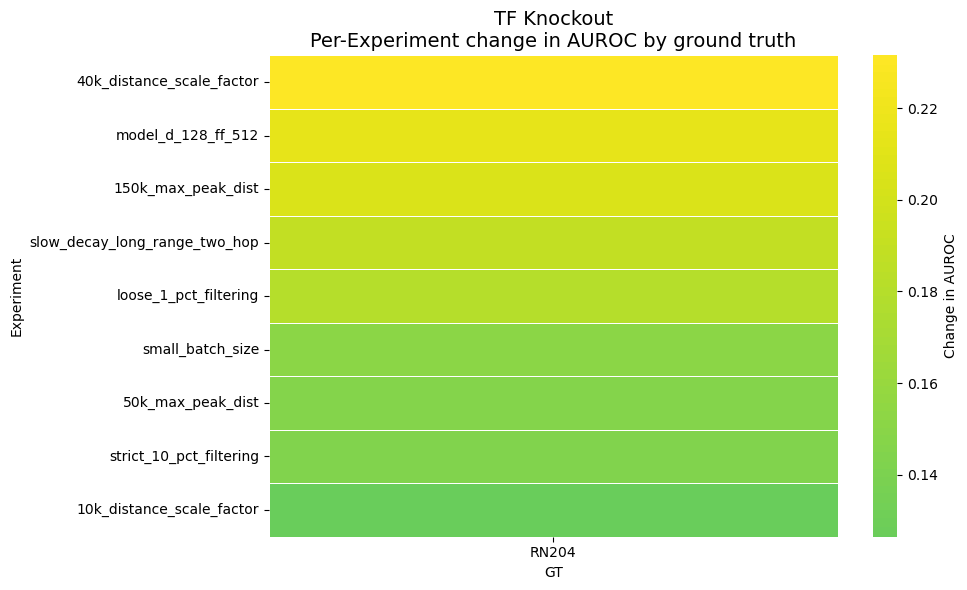

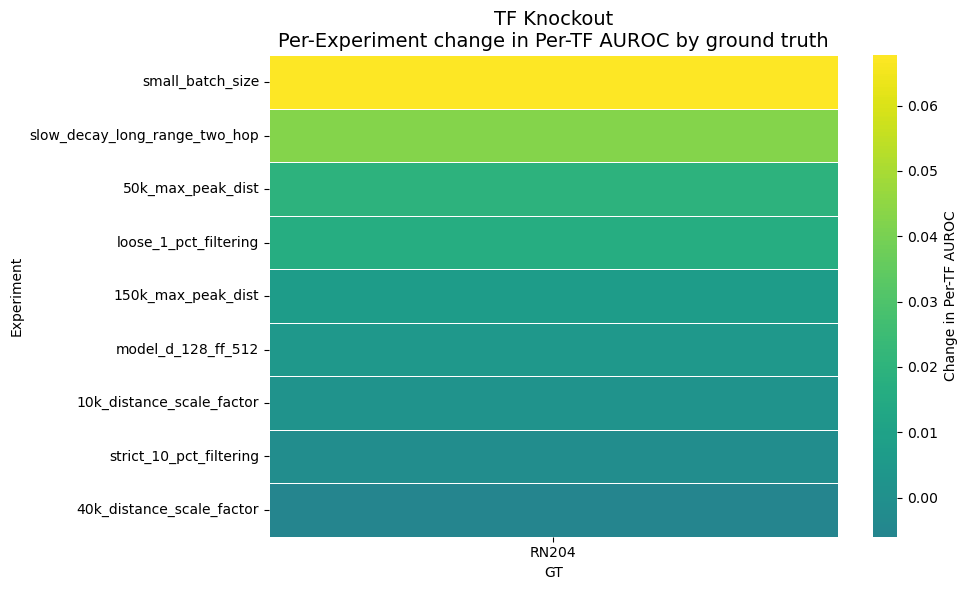

In [13]:
df = final_df.copy()

# Baseline experiment
BASELINE = "Initial Settings"

GTs = GT_ORDER
METHODS = ["Gradient Attribution", "TF Knockout"]

def melt_gt_metrics(df, metric="Per-TF AUROC"):
    """
    Returns tidy df with:
    Experiment | Method | GT | Value
    """
    rows = []
    for _, r in df.iterrows():
        exp = r["Experiment"]
        for method in METHODS:
            for gt in GTs:
                col = f"{method} | {gt} | {metric}"
                if col in df.columns:
                    rows.append({
                        "Experiment": exp,
                        "Method": method,
                        "Metric": metric,
                        "GT": gt,
                        "Value": r[col]
                    })
    return pd.DataFrame(rows)

def compute_gt_deltas(long_df):
    baseline = (
        long_df[long_df["Experiment"] == BASELINE]
        .set_index(["Method", "GT", "Metric"])["Value"]
    )

    long_df = long_df.copy()
    long_df["Delta"] = long_df.apply(
        lambda r: r["Value"] - baseline.loc[(r["Method"], r["GT"])],
        axis=1
    )
    return long_df

def plot_gt_delta_heatmap(per_tf_delta, method, selected_metric, sort_by="mean"):
    sub = per_tf_delta[
        (per_tf_delta["Method"] == method) &
        (per_tf_delta["Experiment"] != BASELINE) &
        (per_tf_delta["Metric"] == selected_metric)
    ]

    mat = sub.pivot_table(
        index="Experiment",
        columns="GT",
        values="Delta",
        aggfunc="mean"
    )

    if sort_by == "mean":
        mat = mat.loc[mat.mean(axis=1).sort_values(ascending=False).index]

    plt.figure(figsize=(10, max(6, 0.30 * len(mat))))
    sns.heatmap(
        mat,
        center=0,
        cmap="viridis",
        linewidths=0.5,
        cbar_kws={"label": f"Change in {selected_metric}"}
    )
    plt.title(f"{method}\nPer-Experiment change in {selected_metric} by ground truth", fontsize=14)
    plt.tight_layout()
    plt.show()

# "AUROC" for mean AUROC, "Per-TF AUROC" for mean Per-TF AUROC
# Mean AUROC for plotting
mean_melted_df = melt_gt_metrics(df, metric="AUROC")
mean_gt_delta = compute_gt_deltas(mean_melted_df)
mean_ranked = (
    mean_gt_delta[mean_gt_delta["Experiment"] != BASELINE]
    .groupby(["Method", "GT", "Metric", "Experiment"])["Delta"]
    .mean()
    .reset_index()
    .sort_values(["Method", "GT", "Delta"], ascending=[True, True, False])
)

# Per-TF AUROC for plotting
per_tf_melted_df = melt_gt_metrics(df, metric="Per-TF AUROC")
per_tf_gt_delta = compute_gt_deltas(per_tf_melted_df)
per_tf_ranked = (
    per_tf_gt_delta[per_tf_gt_delta["Experiment"] != BASELINE]
    .groupby(["Method", "GT", "Metric", "Experiment"])["Delta"]
    .mean()
    .reset_index()
    .sort_values(["Method", "GT", "Delta"], ascending=[True, True, False])
)


plot_gt_delta_heatmap(mean_ranked, "Gradient Attribution", "AUROC")
plot_gt_delta_heatmap(per_tf_ranked, "Gradient Attribution", "Per-TF AUROC")
plot_gt_delta_heatmap(mean_ranked, "TF Knockout", "AUROC")
plot_gt_delta_heatmap(per_tf_ranked, "TF Knockout", "Per-TF AUROC")

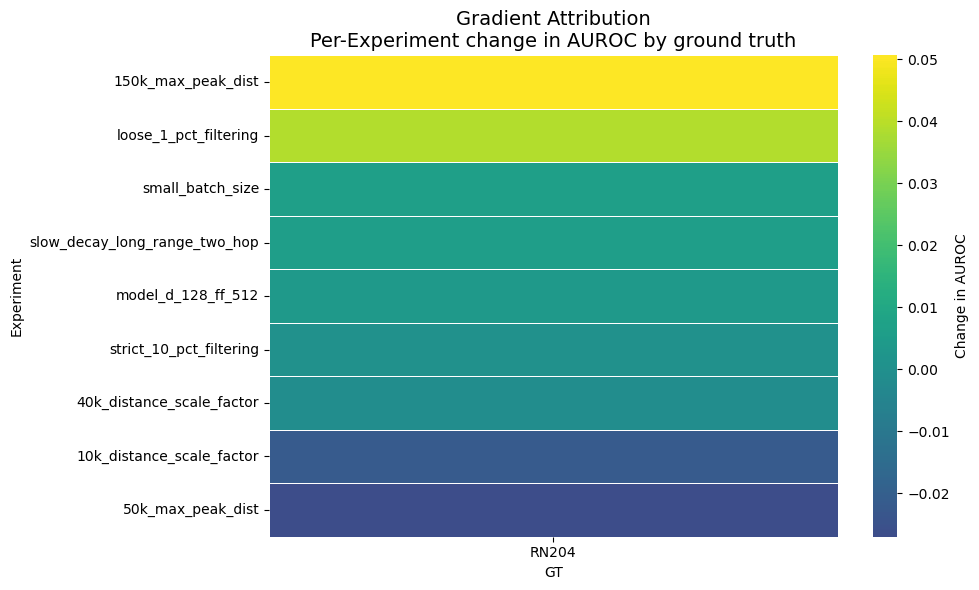

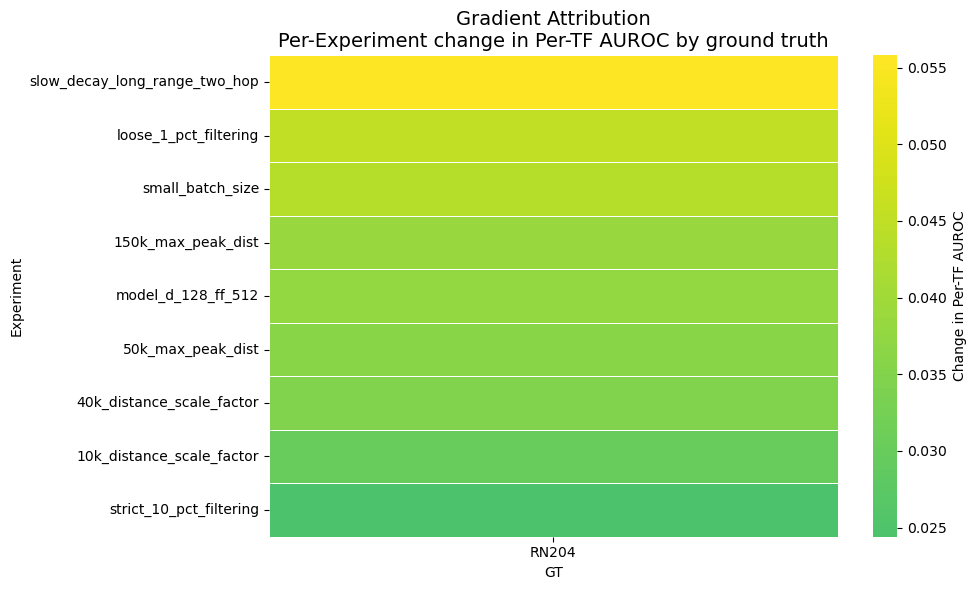

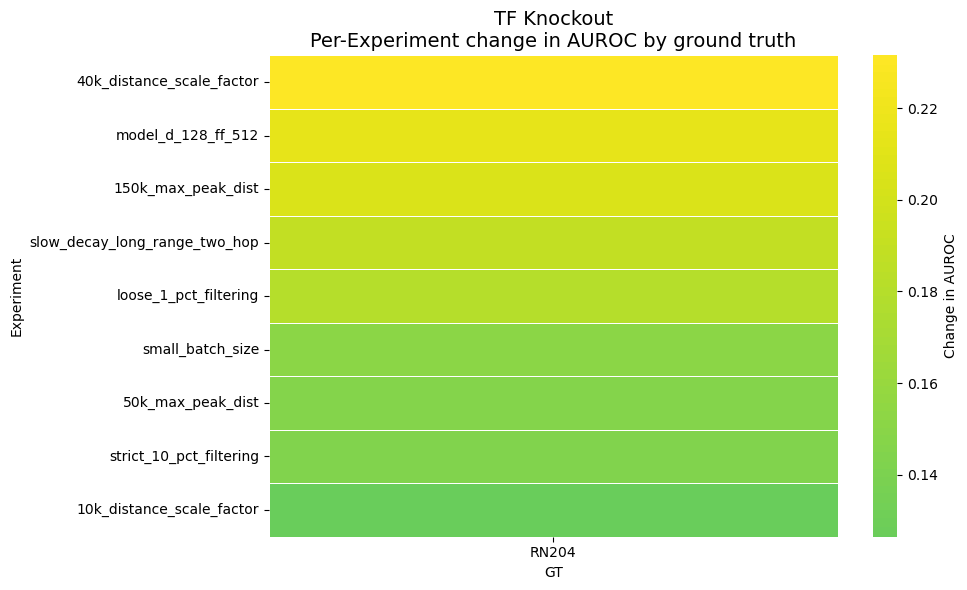

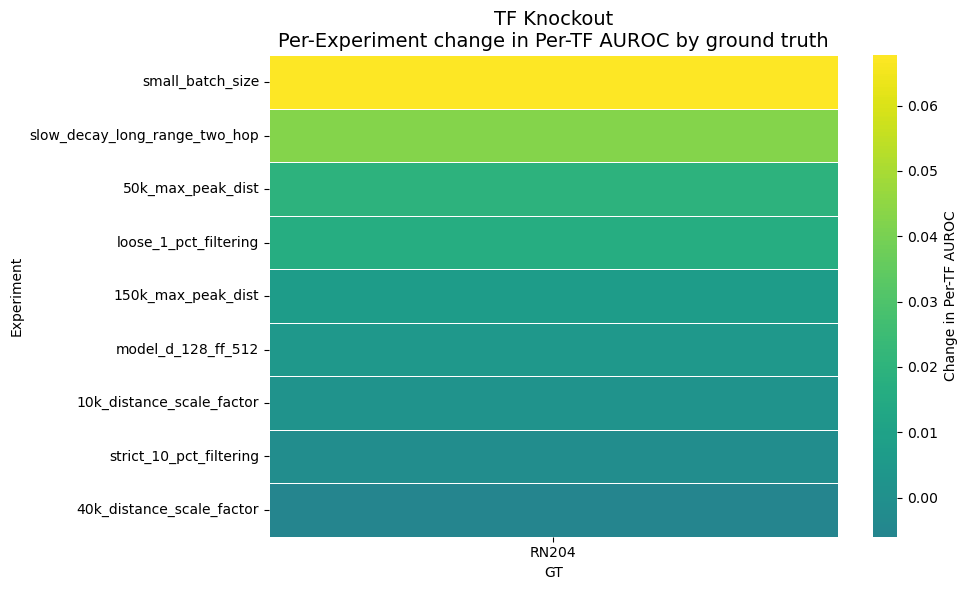

In [15]:
df = final_df.copy()

# Baseline experiment
BASELINE = "Initial Settings"

GTs = GT_ORDER
METHODS = ["Gradient Attribution", "TF Knockout"]

def melt_gt_metrics(df, metric="Per-TF AUROC"):
    """
    Returns tidy df with:
    Experiment | Method | GT | Value
    """
    rows = []
    for _, r in df.iterrows():
        exp = r["Experiment"]
        for method in METHODS:
            for gt in GTs:
                col = f"{method} | {gt} | {metric}"
                if col in df.columns:
                    rows.append({
                        "Experiment": exp,
                        "Method": method,
                        "Metric": metric,
                        "GT": gt,
                        "Value": r[col]
                    })
    return pd.DataFrame(rows)

def compute_gt_deltas(long_df):
    baseline = (
        long_df[long_df["Experiment"] == BASELINE]
        .set_index(["Method", "GT", "Metric"])["Value"]
    )

    long_df = long_df.copy()
    long_df["Delta"] = long_df.apply(
        lambda r: r["Value"] - baseline.loc[(r["Method"], r["GT"])],
        axis=1
    )
    return long_df

def plot_gt_delta_heatmap(per_tf_delta, method, selected_metric, sort_by="mean"):
    sub = per_tf_delta[
        (per_tf_delta["Method"] == method) &
        (per_tf_delta["Experiment"] != BASELINE) &
        (per_tf_delta["Metric"] == selected_metric)
    ]

    mat = sub.pivot_table(
        index="Experiment",
        columns="GT",
        values="Delta",
        aggfunc="mean"
    )

    if sort_by == "mean":
        mat = mat.loc[mat.mean(axis=1).sort_values(ascending=False).index]

    plt.figure(figsize=(10, max(6, 0.30 * len(mat))))
    sns.heatmap(
        mat,
        center=0,
        cmap="viridis",
        linewidths=0.5,
        cbar_kws={"label": f"Change in {selected_metric}"}
    )
    plt.title(f"{method}\nPer-Experiment change in {selected_metric} by ground truth", fontsize=14)
    plt.tight_layout()
    plt.show()

# "AUROC" for mean AUROC, "Per-TF AUROC" for mean Per-TF AUROC
# Mean AUROC for plotting
mean_melted_df = melt_gt_metrics(df, metric="AUROC")
mean_gt_delta = compute_gt_deltas(mean_melted_df)
mean_ranked = (
    mean_gt_delta[mean_gt_delta["Experiment"] != BASELINE]
    .groupby(["Method", "GT", "Metric", "Experiment"])["Delta"]
    .mean()
    .reset_index()
    .sort_values(["Method", "GT", "Delta"], ascending=[True, True, False])
)

# Per-TF AUROC for plotting
per_tf_melted_df = melt_gt_metrics(df, metric="Per-TF AUROC")
per_tf_gt_delta = compute_gt_deltas(per_tf_melted_df)
per_tf_ranked = (
    per_tf_gt_delta[per_tf_gt_delta["Experiment"] != BASELINE]
    .groupby(["Method", "GT", "Metric", "Experiment"])["Delta"]
    .mean()
    .reset_index()
    .sort_values(["Method", "GT", "Delta"], ascending=[True, True, False])
)


plot_gt_delta_heatmap(mean_ranked, "Gradient Attribution", "AUROC")
plot_gt_delta_heatmap(per_tf_ranked, "Gradient Attribution", "Per-TF AUROC")
plot_gt_delta_heatmap(mean_ranked, "TF Knockout", "AUROC")
plot_gt_delta_heatmap(per_tf_ranked, "TF Knockout", "Per-TF AUROC")

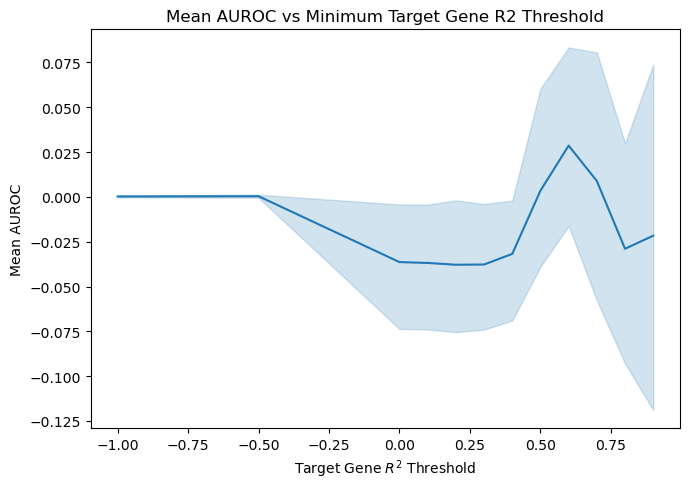

In [16]:
all_experiments = []
for experiment_name, experiment_dir in experiment_dict.items():
    if "auroc_by_tg_r2_threshold.csv" in os.listdir(experiment_dir):
        auroc_by_r2 = pd.read_csv(experiment_dir / "auroc_by_tg_r2_threshold.csv", header=0)
        
        auroc_by_r2["Experiment"] = experiment_name
        all_experiments.append(auroc_by_r2)
        
    else:
        print("  auroc_by_tg_r2_threshold.csv not found.")
        
total_threshold_by_tg_r2_df = pd.concat(all_experiments, axis=0, ignore_index=True)

cols = ["Experiment", "frac_edges_kept", "min_tg_r2", "baseline_macro", "baseline_micro", "macro_auroc", "micro_auroc"]

final_df = total_threshold_by_tg_r2_df[cols].copy()
final_df["standardized_macro_auroc"] = (final_df["macro_auroc"] - final_df["baseline_macro"]) / (1 - final_df["baseline_macro"])
final_df["standardized_micro_auroc"] = (final_df["micro_auroc"] - final_df["baseline_micro"]) / (1 - final_df["baseline_micro"])

plt.figure(figsize=(7,5))
# Density plot
sns.lineplot(
    data=final_df,
    x="min_tg_r2",
    y="standardized_macro_auroc",
    legend=False
    )

plt.title("Mean AUROC vs Minimum Target Gene R2 Threshold")
plt.xlabel(f"Target Gene $R^{2}$ Threshold")
plt.ylabel("Mean AUROC")
plt.tight_layout()
plt.show()

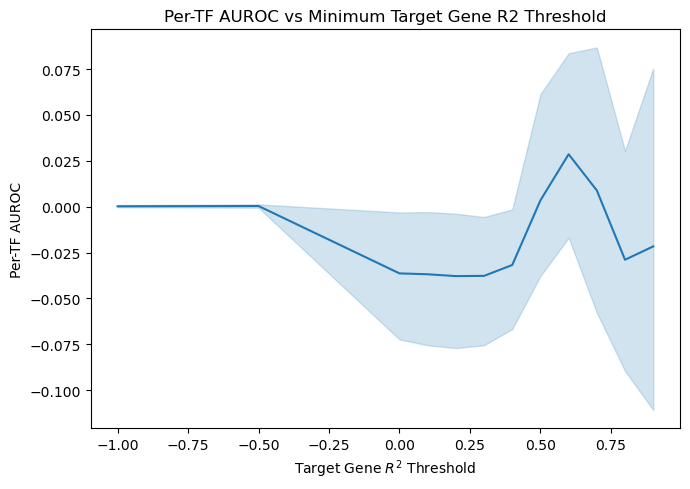

In [17]:
plt.figure(figsize=(7,5))
# Density plot
sns.lineplot(
    data=final_df,
    x="min_tg_r2",
    y="standardized_micro_auroc",
    legend=False
    )

plt.title("Per-TF AUROC vs Minimum Target Gene R2 Threshold")
plt.xlabel(f"Target Gene $R^{2}$ Threshold")
plt.ylabel("Per-TF AUROC")
plt.tight_layout()
plt.show()